In [1]:
#!pip install numpy
#!pip install scipy
#!pip install torch
#!pip install torch_geometric
#!pip install matplotlib
#!pip install scikit-learn
#!pip install pandas
#!pip install git+https://github.com/alitwinkumar/connectome_tools.git
#!pip install torch_scatter
#!pip install torch_sparse

In [2]:
# Install required packages.
import os
import torch
import numpy as np
import pandas as pd
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

# Helper function for visualization.
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
    

2.6.0


In [3]:
def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

In [190]:
from connectome_tools import load_flywire
# Use connectome_loaders to import FlyWire neurons 
neurons, _ = load_flywire('FlyWire_data/') # datapath to FlyWire 
neurons

,root_id,group,nt_type,nt_type_score,da_avg,ser_avg,gaba_avg,glut_avg,ach_avg,oct_avg,...,class,sub_class,cell_type,hemibrain_type,hemilineage,side,nerve,J_idx,J_idx_post,J_idx_pre
0,720575940596125868,LO.LOP,ACH,0.57,0.03,0.00,0.05,0.28,0.57,0.07,...,NaN,NaN,T5c,NaN,NaN,right,NaN,0,0,0
1,720575940597856265,ME,ACH,0.85,0.01,0.00,0.03,0.04,0.85,0.07,...,NaN,NaN,Tm16,NaN,NaN,right,NaN,1,1,1
2,720575940597944841,ME.LO,ACH,0.82,0.02,0.00,0.01,0.05,0.82,0.09,...,NaN,NaN,CB3851,NaN,NaN,right,NaN,2,2,2
3,720575940598267657,ME,GABA,0.74,0.01,0.01,0.74,0.19,0.03,0.02,...,NaN,NaN,TmY15,NaN,NaN,right,NaN,3,3,3
4,720575940599333574,ME,ACH,0.61,0.02,0.00,0.13,0.13,0.61,0.11,...,NaN,NaN,Tm1,NaN,NaN,right,NaN,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139250,720575940661335681,GNG,GABA,0.71,0.00,0.00,0.71,0.17,0.11,0.00,...,NaN,NaN,CB0180,NaN,MX12__prim,left,NaN,139250,139250,139250
139251,720575940661336193,ME.LO,ACH,0.62,0.02,0.00,0.18,0.16,0.62,0.03,...,NaN,NaN,TmY3,NaN,NaN,left,NaN,139251,139251,139251
139252,720575940661337217,SCL.MB_ML,ACH,1.00,0.00,0.00,0.00,0.00,1.00,0.00,...,Kenyon_Cell,NaN,NaN,KCab-p,MBp4,left,NaN,139252,139252,139252
139253,720575940661338497,GNG,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,CB0904,NaN,putative_primary,right,PhN,139253,139253,139253


## neurons = _attempt_load("neurons.csv")
## lassif = _attempt_load("classification.csv")
## conns = _attempt_load("connections.csv")
## coordinates = _attempt_load('coordinates.csv')
## syn_coordinates = _attempt_load('synapse_coordinates.csv')

In [191]:
neurons.columns


Index(['root_id', 'group', 'nt_type', 'nt_type_score', 'da_avg', 'ser_avg',
       'gaba_avg', 'glut_avg', 'ach_avg', 'oct_avg', 'flow', 'super_class',
       'class', 'sub_class', 'cell_type', 'hemibrain_type', 'hemilineage',
       'side', 'nerve', 'J_idx', 'J_idx_post', 'J_idx_pre'],
      dtype='object')

In [192]:
# Import FlyWire connections as an edgelist
connections = pd.read_csv('FlyWire_data/connections.csv')
connections

,pre_root_id,post_root_id,neuropil,syn_count,nt_type
0,720575940629970489,720575940631267655,AVLP_R,7,GABA
1,720575940605876866,720575940606514878,LAL_R,15,GABA
2,720575940627737365,720575940628914436,AL_L,32,ACH
3,720575940633587552,720575940626452879,SMP_R,15,ACH
4,720575940616871878,720575940621203973,AVLP_L,13,GABA
...,...,...,...,...,...
3869873,720575940621773517,720575940611139733,PVLP_R,1,ACH
3869874,720575940622734576,720575940609171395,ICL_L,2,ACH
3869875,720575940638466367,720575940627036426,LO_L,5,ACH
3869876,720575940629789660,720575940631553603,GOR_R,3,ACH


In [193]:
cell_stats = pd.read_csv('FlyWire_data/cell_stats.csv')


In [194]:
cell_stats

,root_id,length_nm,area_nm,size_nm
0,720575940596125868,396840,628299136,37616302080
1,720575940597856265,1184013,1634424448,100004290560
2,720575940597944841,784742,1022307072,58954229760
3,720575940598267657,1645960,2346787840,140744601600
4,720575940599333574,575383,1366784768,111170764800
...,...,...,...,...
139241,720575940661333889,1292208,2567808384,194386442240
139242,720575940661335681,3800832,8201410304,745657835520
139243,720575940661336193,854317,1337822848,90069493760
139244,720575940661337217,948687,1959185664,135310899200


In [195]:
neurons['root_id']

0         720575940596125868
1         720575940597856265
2         720575940597944841
3         720575940598267657
4         720575940599333574
                 ...        
139250    720575940661335681
139251    720575940661336193
139252    720575940661337217
139253    720575940661338497
139254    720575940661339777
Name: root_id, Length: 139255, dtype: int64

In [196]:
cell_stats['root_id']

0         720575940596125868
1         720575940597856265
2         720575940597944841
3         720575940598267657
4         720575940599333574
                 ...        
139241    720575940661333889
139242    720575940661335681
139243    720575940661336193
139244    720575940661337217
139245    720575940661339777
Name: root_id, Length: 139246, dtype: int64

In [183]:
connections['neuropil'].unique()

array(['AVLP_R', 'LAL_R', 'AL_L', 'SMP_R', 'AVLP_L', 'MB_ML_R', 'CRE_L',
       'SLP_R', 'GNG', 'CRE_R', 'SMP_L', 'EB', 'PRW', 'AL_R', 'MB_VL_L',
       'GA_L', 'AOTU_R', 'MB_ML_L', 'SIP_R', 'LA_R', 'MB_VL_R', 'FLA_R',
       'LAL_L', 'FLA_L', 'MB_PED_R', 'SAD', 'AMMC_R', 'AOTU_L', 'PVLP_R',
       'GA_R', 'SIP_L', 'MB_PED_L', 'AMMC_L', 'LO_L', 'LOP_L', 'LO_R',
       'PLP_R', 'LOP_R', 'ME_L', 'MB_CA_L', 'ME_R', 'SLP_L', 'PLP_L',
       'LH_L', 'SPS_L', 'IPS_R', 'SPS_R', 'PVLP_L', 'SCL_R', 'ICL_R',
       'NO', 'WED_L', 'MB_CA_R', 'WED_R', 'ICL_L', 'VES_L', 'LA_L',
       'IB_R', 'ATL_L', 'FB', 'LH_R', 'IB_L', 'IPS_L', 'VES_R', 'EPA_L',
       'GOR_R', 'PB', 'GOR_L', 'EPA_R', 'SCL_L', 'ATL_R', 'AME_R',
       'AME_L', 'CAN_R', 'OCG', 'BU_R', 'CAN_L', 'UNASGD', 'BU_L'],
      dtype=object)

In [184]:
#pd.set_option('display.max_rows', None)

In [197]:
connections['neuropil'].value_counts()

neuropil
ME_R      488839
ME_L      421151
LO_R      232176
LO_L      219046
GNG       155111
           ...  
GA_R        1318
BU_R        1043
UNASGD       713
BU_L         632
OCG          618
Name: count, Length: 79, dtype: int64

In [186]:
# Restrict dataset to a specific neuropil 
#neuropil_of_interest = 'LH_L'
#connections = connections[connections['neuropil'] == neuropil_of_interest] # Filter connections in edgelist by neuropil of interest
neuropils_of_interest = ['LH_L', 'ME_R']
connections = connections[connections['neuropil'].isin(neuropils_of_interest)]

lh_neurons = list(np.unique(list(connections['pre_root_id']) + list(connections['post_root_id']))) # Subselect neurons in neuropil of interest
neurons = neurons[neurons['root_id'].isin(lh_neurons)]
cell_stats = cell_stats[cell_stats['root_id'].isin(lh_neurons)]
#cell_stats = cell_stats[neurons['root_id']] # Filter connections in edgelist by neuropil of interest

print('Number of neurons in ' + neuropil_of_interest + ': ' + str(len(neurons)))

Number of neurons in LH_L: 40202


# perturb some neurons
# diffuisve over graph
# region labeling


In [187]:
cell_stats['root_id'].isin(lh_neurons)

1         True
2         True
3         True
4         True
5         True
          ... 
139213    True
139219    True
139221    True
139230    True
139234    True
Name: root_id, Length: 40197, dtype: bool

In [198]:
np.sum(neurons['super_class'] == 'ascending')

np.int64(2362)

In [199]:
neurons['super_class'].value_counts()

super_class
optic                 77536
central               32388
sensory               16903
visual_projection      8053
ascending              2362
descending             1303
visual_centrifugal      524
motor                   106
endocrine                80
Name: count, dtype: int64

In [189]:
neurons['root_id'].isin(lh_neurons)

1         True
2         True
3         True
4         True
5         True
          ... 
139221    True
139227    True
139229    True
139238    True
139242    True
Name: root_id, Length: 40202, dtype: bool

In [121]:
filtered_df = neurons[neurons['nt_type'].map(neurons['nt_type'].value_counts()) > 200]

In [122]:
neurons['nt_type'].value_counts()

nt_type
ACH        2310
GLUT       1093
GABA        452
missing     154
DA           29
SER          21
OCT           8
Name: count, dtype: int64

In [123]:
filtered_df['nt_type'].value_counts()

nt_type
ACH     2310
GLUT    1093
GABA     452
Name: count, dtype: int64

In [18]:
cell_stats

,root_id,length_nm,area_nm,size_nm
86,720575940602849248,939055,1577045632,97058508800
104,720575940602974688,2009104,3871578368,247878727680
126,720575940603152998,850531,1624214400,111268567040
127,720575940603167916,818866,1364631808,82079907840
140,720575940603231916,2202965,6318038016,617312942080
...,...,...,...,...
138928,720575940660177025,1159454,1831047552,94709811200
138965,720575940660281217,2481958,5995685504,494148567040
138976,720575940660313729,2776790,5538599936,364797030400
139151,720575940661089921,7651838,12332130304,896693237760


In [19]:
neurons

,root_id,group,nt_type,nt_type_score,da_avg,ser_avg,gaba_avg,glut_avg,ach_avg,oct_avg,...,class,sub_class,cell_type,hemibrain_type,hemilineage,side,nerve,J_idx,J_idx_post,J_idx_pre
86,720575940602849248,LH.SLP,NaN,0.00,0.01,0.00,0.41,0.46,0.12,0.00,...,NaN,NaN,CB2965,NaN,VLPl4_dorsal,left,NaN,86,86,86
104,720575940602974688,AVLP,ACH,0.80,0.07,0.03,0.04,0.05,0.80,0.00,...,NaN,NaN,CB2377,NaN,LHp2,left,NaN,104,104,104
126,720575940603152998,PLP,GLUT,0.58,0.02,0.00,0.37,0.58,0.03,0.00,...,NaN,NaN,NaN,"WEDPN6B,WEDPN6C",VPNp&v1_posterior,left,NaN,126,126,126
127,720575940603167916,LH.AVLP,GLUT,0.59,0.06,0.01,0.32,0.59,0.01,0.00,...,NaN,NaN,NaN,"AVLP011,AVLP012",VLPl4_dorsal,left,NaN,127,127,127
140,720575940603231916,AL.MB_CA,ACH,0.94,0.01,0.01,0.01,0.01,0.94,0.01,...,ALPN,uniglomerular,NaN,DA1_lPN,ALl1_ventral,left,NaN,140,140,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138936,720575940660177025,LH.SLP,ACH,0.66,0.20,0.02,0.03,0.09,0.66,0.01,...,NaN,NaN,CB2180,NaN,VLPl2_posterior,left,NaN,138936,138936,138936
138973,720575940660281217,SCL.LH,GABA,0.91,0.00,0.00,0.91,0.05,0.04,0.00,...,NaN,NaN,NaN,AVLP447,ALv1,left,NaN,138973,138973,138973
138984,720575940660313729,GNG.SLP,ACH,0.96,0.03,0.00,0.01,0.00,0.96,0.01,...,NaN,NaN,NaN,SLP237,ALl1_ventral,left,NaN,138984,138984,138984
139159,720575940661089921,PLP.SPS,ACH,0.80,0.07,0.01,0.02,0.09,0.80,0.01,...,NaN,NaN,NaN,PLP209,SMPpv2_ventral,left,NaN,139159,139159,139159


In [20]:
all_neurons = list(neurons['root_id']) # List of neurons in graph
#all_neuron_types = list(neurons['cell_type']) # List of types for each neuron in graph
all_neuron_types = list(neurons['class']) # List of types for each neuron in graph


In [21]:
neurons['class']

86         NaN
104        NaN
126        NaN
127        NaN
140       ALPN
          ... 
138936     NaN
138973     NaN
138984     NaN
139159     NaN
139169    ALPN
Name: class, Length: 4067, dtype: object

In [22]:
# %%
#all_unique_types = np.array((neurons['cell_type'].unique())) # List of unique neuron types in graph
all_unique_types = np.array((neurons['class'].unique())) # List of unique neuron types in graph


In [23]:
all_unique_types

array([nan, 'ALPN', 'Kenyon_Cell', 'LHLN', 'AN', 'LHCENT', 'MBON', 'CX',
       'ALIN', 'mAL', 'DAN', 'bilateral', 'MBIN'], dtype=object)

In [24]:

# Node attributes: The cell type of each neuron (this will be represented as a one-hot encoding)
# (num_nodes, num_feats)
node_types = np.zeros((len(all_neurons), len(all_unique_types)))
for i_neuron, neuron in enumerate(all_neurons):
    i_type = np.where(all_unique_types == all_neuron_types[i_neuron])
    assert len(i_type) == 1
    node_types[i_neuron, i_type] = 1
    


In [25]:
# Edge attributes: The strength of connectivity (synaptic count) of each connection
connections = connections.astype({"syn_count": 'float32'})

In [26]:
import networkx as nx

In [27]:
# networkx graph -> PyTorch geometric object transformation is easy
G = nx.DiGraph() # Initialize a networkx directed graph 
G = nx.from_pandas_edgelist(connections, 'pre_root_id', 'post_root_id', ['syn_count'], create_using=nx.DiGraph()) # Create a graph with our node and edge information

In [134]:
G

In [28]:
# Get unique values from 'Column1'
unique_labels = neurons['nt_type'].unique()

print(unique_labels)

[nan 'ACH' 'GLUT' 'GABA' 'DA' 'SER' 'OCT']


In [29]:
import pandas as pd


In [30]:
neurons.loc[:, 'nt_type'] = neurons['nt_type'].fillna('missing')

In [31]:
neurons.loc[:, 'class'] = neurons['class'].fillna('missing')

In [32]:
neurons.loc[:, 'class']

86        missing
104       missing
126       missing
127       missing
140          ALPN
           ...   
138936    missing
138973    missing
138984    missing
139159    missing
139169       ALPN
Name: class, Length: 4067, dtype: object

In [33]:
neurons['nt_type']

86        missing
104           ACH
126          GLUT
127          GLUT
140           ACH
           ...   
138936        ACH
138973       GABA
138984        ACH
139159        ACH
139169        ACH
Name: nt_type, Length: 4067, dtype: object

In [34]:
cat = pd.Categorical(neurons['nt_type'])

print(cat)
print(cat.codes)     # Numeric codes
print(cat.categories)  # Category labels

['missing', 'ACH', 'GLUT', 'GLUT', 'ACH', ..., 'ACH', 'GABA', 'ACH', 'ACH', 'ACH']
Length: 4067
Categories (7, object): ['ACH', 'DA', 'GABA', 'GLUT', 'OCT', 'SER', 'missing']
[6 0 3 ... 0 0 0]
Index(['ACH', 'DA', 'GABA', 'GLUT', 'OCT', 'SER', 'missing'], dtype='object')


In [35]:
pd.Categorical(neurons['class']).codes

array([12, 12, 12, ..., 12, 12,  1], shape=(4067,), dtype=int8)

In [36]:
from torch_geometric.utils.convert import from_networkx

In [37]:
#neurons

In [38]:
import numpy as np

In [87]:
# Convert graph into PyTorch geometric object
graph = from_networkx(G, group_edge_attrs=['syn_count']) # Add edge attributes from networkx graph

feat1 = torch.from_numpy(cell_stats['length_nm'].to_numpy()).float().unsqueeze(1)
feat2 = torch.from_numpy(cell_stats['area_nm'].to_numpy()).float().unsqueeze(1)
feat3 = torch.from_numpy(np.copy(pd.Categorical(neurons['class']).codes)).long().unsqueeze(1)
feat4 = torch.from_numpy(np.copy(pd.Categorical(neurons['nt_type']).codes)).float().unsqueeze(1)

graph.x = torch.cat([feat1, feat2, feat3, feat4], dim=1)
#graph.x = torch.cat([feat1, feat2], dim=1)
#graph.x = torch.cat([feat4], dim=1)
#graph.x = torch.from_numpy(cell_stats['length_nm'].to_numpy()).float().unsqueeze(1)
#graph.x = torch.from_numpy(node_types).float() # Add node attributes (one-hot encoded cell type)


In [132]:
torch.max(graph.edge_index[0])

tensor(4066)

In [133]:
graph

Data(edge_index=[2, 41132], edge_attr=[41132], num_nodes=4067, x=[4067, 4], y=[4067], train_mask=[4067], val_mask=[4067], test_mask=[4067])

In [88]:
feat3.shape

torch.Size([4067, 1])

In [89]:
from torch_geometric.transforms import GDC

gdc = GDC(
    self_loop_weight=1,
    normalization_in='sym',
    normalization_out='col',
    diffusion_kwargs=dict(method='ppr', alpha=0.15, eps=1e-4),
    sparsification_kwargs=dict(method='threshold', eps=1e-4),
    exact=True
)
from torch_sparse import spmm


In [90]:
print(graph.edge_attr.shape)

torch.Size([41132, 1])


In [91]:

graph.edge_attr = graph.edge_attr.view(-1)
data_diffused = gdc(graph)

# 1) Apply GDC to get a diffused adjacency:
data_diffused = gdc(graph)  # This modifies edge_index, edge_attr in a new Data object.

# data_diffused.edge_index is the "diffused" adjacency structure
# data_diffused.edge_attr (if not None) are the corresponding weights

# 2) Multiply the new adjacency by your features:
edge_index = data_diffused.edge_index
edge_weight = data_diffused.edge_attr  # or None if unweighted
X = graph.x

# spmm performs sparse matrix multiplication:  X_new = A * X
# where A is encoded by (edge_index, edge_weight)
X_diffused = spmm(edge_index, edge_weight, X.size(0), X.size(0), X)

# Now X_diffused has the "diffused" features for each node
graph.x = X_diffused  # Overwrite original features if desired

In [92]:
graph.y = torch.from_numpy(pd.Categorical(neurons['nt_type']).codes).long()

In [93]:
graph.x.shape

torch.Size([4067, 4])

In [94]:
num_features = graph.x.shape[1]
num_classes = len(np.unique(graph.y))
num_nodes = graph.x.shape[0]

In [95]:
num_features

4

In [96]:
num_nodes

4067

In [97]:
num_classes

7

In [98]:
torch.sum(graph.y == 0)

tensor(2310)

In [99]:
import torch
from torch_geometric.utils import index_to_mask

def create_balanced_split(data, num_train_per_class, num_val_per_class=0, num_test_per_class=50):
    y = data.y
    num_nodes = data.num_nodes
    unique_classes = torch.unique(y)

    train_idx = []
    val_idx = []
    test_idx = []

    for c in unique_classes:
        class_nodes = (y == c).nonzero(as_tuple=True)[0]
        class_nodes = class_nodes[torch.randperm(class_nodes.size(0))]

        total_needed = num_train_per_class + num_val_per_class + num_test_per_class
        if len(class_nodes) < total_needed:
            raise ValueError(f"Not enough samples for class {c.item()}. Needed {total_needed}, got {len(class_nodes)}.")

        train = class_nodes[:num_train_per_class]
        val = class_nodes[num_train_per_class:num_train_per_class + num_val_per_class]
        test = class_nodes[num_train_per_class + num_val_per_class:total_needed]

        train_idx.append(train)
        val_idx.append(val)
        test_idx.append(test)

    train_mask = index_to_mask(torch.cat(train_idx), size=num_nodes)
    val_mask = index_to_mask(torch.cat(val_idx), size=num_nodes) if num_val_per_class > 0 else None
    test_mask = index_to_mask(torch.cat(test_idx), size=num_nodes)

    data.train_mask = train_mask
    if val_mask is not None:
        data.val_mask = val_mask
    data.test_mask = test_mask

    return data


In [100]:
#print(graph.y.bincount())

In [101]:
# Make a balanced split with 20 train, 10 val, 50 test nodes per class
#graph = create_balanced_split(graph, num_train_per_class=20, num_val_per_class=10, num_test_per_class=50)

# Quick check
#print("Train class counts:", graph.y[graph.train_mask].bincount())
#print("Val class counts:", graph.y[graph.val_mask].bincount())
#print("Test class counts:", graph.y[graph.test_mask].bincount())


In [ ]:
#import torch_geometric.transforms as T

# Define the transform
#transform = T.RandomNodeSplit(split='class', num_val=0.1, num_test=0.2, num_train_per_class=20)

# Apply it to your graph
#graph = transform(graph)


AssertionError: 

In [128]:
T.RandomNodeSplit?

Init signature:
T.RandomNodeSplit(
    split: str = 'train_rest',
    num_splits: int = 1,
    num_train_per_class: int = 20,
    num_val: Union[int, float] = 500,
    num_test: Union[int, float] = 1000,
    key: Optional[str] = 'y',
) -> None
Docstring:     
Performs a node-level random split by adding :obj:`train_mask`,
:obj:`val_mask` and :obj:`test_mask` attributes to the
:class:`~torch_geometric.data.Data` or
:class:`~torch_geometric.data.HeteroData` object
(functional name: :obj:`random_node_split`).

Args:
    split (str, optional): The type of dataset split (:obj:`"train_rest"`,
        :obj:`"test_rest"`, :obj:`"random"`).
        If set to :obj:`"train_rest"`, all nodes except those in the
        validation and test sets will be used for training (as in the
        `"FastGCN: Fast Learning with Graph Convolutional Networks via
        Importance Sampling" <https://arxiv.org/abs/1801.10247>`_ paper).
        If set to :obj:`"test_rest"`, all nodes except those in the
        

In [127]:
import torch_geometric
print(torch_geometric.__version__)

2.6.1


In [103]:
#train_ratio = 0.7  # 70% of nodes for training

# Create train and test masks
#num_train = int(train_ratio * num_nodes)
#train_mask = torch.zeros(num_nodes, dtype=torch.bool)
#test_mask = torch.zeros(num_nodes, dtype=torch.bool)

# Assign random train and test nodes
#perm = torch.randperm(num_nodes)
#train_mask[perm[:num_train]] = True
#test_mask[perm[num_train:]] = True

# Create PyG Data object
#data = Data(x=hidden_states, edge_index=edge_index, y=y2, train_mask=train_mask, test_mask=test_mask, edge_attr=edge_attr)
#data = Data(x=hidden_states.detach(), edge_index=edge_index, y=y2, train_mask=train_mask, test_mask=test_mask)


In [104]:
#graph.train_mask = train_mask # Add node attributes (one-hot encoded cell type)
#graph.test_mask = test_mask # Add node attributes (one-hot encoded cell type)


In [111]:
torch.bincount(graph.y[graph.test_mask])

tensor([462,   5,  82, 232,   4,   1,  27])

In [68]:
from torch_geometric.transforms import NormalizeFeatures

transform = NormalizeFeatures()
graph = transform(graph)

In [69]:
# Show all column labels
column_labels = neurons.columns

print(column_labels)

Index(['root_id', 'group', 'nt_type', 'nt_type_score', 'da_avg', 'ser_avg',
       'gaba_avg', 'glut_avg', 'ach_avg', 'oct_avg', 'flow', 'super_class',
       'class', 'sub_class', 'cell_type', 'hemibrain_type', 'hemilineage',
       'side', 'nerve', 'J_idx', 'J_idx_post', 'J_idx_pre'],
      dtype='object')


In [70]:
from torch_geometric.data import Data
from torch_geometric.utils import to_dense_adj

In [71]:
from torch_geometric.utils import degree

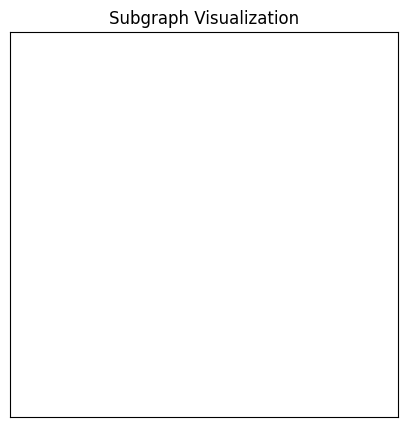

In [72]:
from torch_geometric.utils import subgraph, to_networkx
import networkx as nx

# Draw subgraph
plt.figure(figsize=(5, 5))
#nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray", node_size=100, font_size=8)
plt.xticks([])
plt.yticks([])
plt.title("Subgraph Visualization")
plt.show()

In [144]:
#Cora dataset, to confirm code is working
from torch_geometric.datasets import Planetoid
dataset = Planetoid(root='data/Planetoid', name='Cora')#, transform=NormalizeFeatures())
graph = dataset[0]  # Get the first graph object.
num_features = graph.x.shape[1]
num_classes = len(np.unique(graph.y))
num_nodes = graph.x.shape[0]

(array([ 56., 202.,  94.,  45., 131., 469., 917., 655., 136.,   3.]),
 array([ 1.        ,  3.9000001 ,  6.80000019,  9.70000076, 12.60000038,
        15.5       , 18.40000153, 21.30000114, 24.20000076, 27.10000038,
        30.        ]),
 <BarContainer object of 10 artists>)

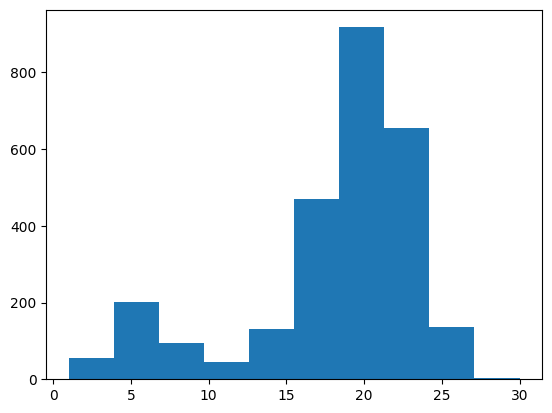

In [150]:
plt.hist(torch.sum(graph.x, dim=1))

In [74]:
num_features

2

In [75]:
num_classes

7

In [76]:
num_nodes

4067

## Training a Multi-layer Perception Network (MLP)

In theory, we should be able to infer the category of a neuron solely based on its content, *i.e.* its actvity feature representation, without taking any relational information into account.

Let's verify that by constructing a simple MLP that solely operates on input node features (using shared weights across all nodes):

In [77]:
import torch
from torch.nn import Linear
import torch.nn.functional as F


class MLP(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(12345)
        self.lin1 = Linear(num_features, hidden_channels)
        self.lin2 = Linear(hidden_channels, num_classes)

    def forward(self, x):
        x = self.lin1(x)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin2(x)
        return x

model = MLP(hidden_channels=16)
print(model)

MLP(
  (lin1): Linear(in_features=2, out_features=16, bias=True)
  (lin2): Linear(in_features=16, out_features=7, bias=True)
)


Our MLP is defined by two linear layers and enhanced by [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html?highlight=relu#torch.nn.ReLU) non-linearity and [dropout](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html?highlight=dropout#torch.nn.Dropout).
Here, we first reduce the 1433-dimensional feature vector to a low-dimensional embedding (`hidden_channels=16`), while the second linear layer acts as a classifier that should map each low-dimensional node embedding to one of the 7 classes.

Let's train our simple MLP by following a similar procedure as described in [the first part of this tutorial](https://colab.research.google.com/drive/1h3-vJGRVloF5zStxL5I0rSy4ZUPNsjy8).
We again make use of the **cross entropy loss** and **Adam optimizer**.
This time, we also define a **`test` function** to evaluate how well our final model performs on the test node set (which labels have not been observed during training).

In [78]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = MLP(hidden_channels=16)
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)  # Define optimizer.

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(graph.x)  # Perform a single forward pass.
      loss = criterion(out[graph.train_mask], graph.y[graph.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

def test():
      model.eval()
      out = model(graph.x)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[graph.test_mask] == graph.y[graph.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(graph.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc

for epoch in range(1, 1001):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

<IPython.core.display.Javascript object>

Epoch: 001, Loss: 2.0232
Epoch: 002, Loss: 1.9685
Epoch: 003, Loss: 1.9174
Epoch: 004, Loss: 1.8532
Epoch: 005, Loss: 1.8007
Epoch: 006, Loss: 1.7469
Epoch: 007, Loss: 1.6910
Epoch: 008, Loss: 1.6403
Epoch: 009, Loss: 1.5937
Epoch: 010, Loss: 1.5489
Epoch: 011, Loss: 1.4852
Epoch: 012, Loss: 1.4569
Epoch: 013, Loss: 1.4091
Epoch: 014, Loss: 1.3764
Epoch: 015, Loss: 1.3569
Epoch: 016, Loss: 1.3245
Epoch: 017, Loss: 1.3007
Epoch: 018, Loss: 1.2940
Epoch: 019, Loss: 1.2711
Epoch: 020, Loss: 1.2658
Epoch: 021, Loss: 1.2467
Epoch: 022, Loss: 1.2305
Epoch: 023, Loss: 1.2310
Epoch: 024, Loss: 1.2138
Epoch: 025, Loss: 1.2244
Epoch: 026, Loss: 1.2163
Epoch: 027, Loss: 1.2178
Epoch: 028, Loss: 1.2104
Epoch: 029, Loss: 1.2057
Epoch: 030, Loss: 1.2001
Epoch: 031, Loss: 1.1966
Epoch: 032, Loss: 1.1781
Epoch: 033, Loss: 1.1826
Epoch: 034, Loss: 1.1984
Epoch: 035, Loss: 1.1858
Epoch: 036, Loss: 1.1783
Epoch: 037, Loss: 1.1657
Epoch: 038, Loss: 1.1813
Epoch: 039, Loss: 1.1743
Epoch: 040, Loss: 1.1806


In [79]:
out = model(graph.x)


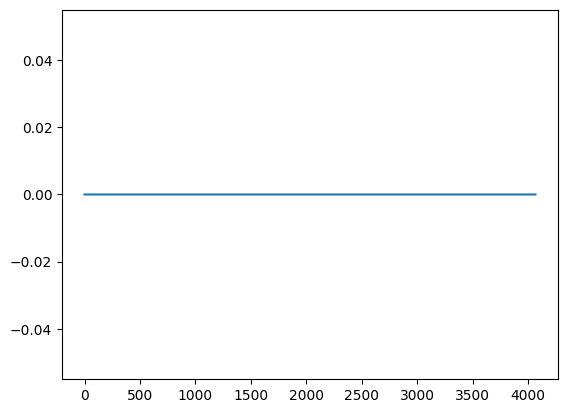

In [80]:
plt.plot(out.argmax(dim=1))

After training the model, we can call the `test` function to see how well our model performs on unseen labels.
Here, we are interested in the accuracy of the model, *i.e.*, the ratio of correctly classified nodes:

In [81]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.5553


## Training a Graph Neural Network (GNN)

We can easily convert our MLP to a GNN by swapping the `torch.nn.Linear` layers with PyG's GNN operators.

Following-up on [the first part of this tutorial](https://colab.research.google.com/drive/1h3-vJGRVloF5zStxL5I0rSy4ZUPNsjy8), we replace the linear layers by the [`GCNConv`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GCNConv) module.
To recap, the **GCN layer** ([Kipf et al. (2017)](https://arxiv.org/abs/1609.02907)) is defined as

$$
\mathbf{x}_v^{(\ell + 1)} = \mathbf{W}^{(\ell + 1)} \sum_{w \in \mathcal{N}(v) \, \cup \, \{ v \}} \frac{1}{c_{w,v}} \cdot \mathbf{x}_w^{(\ell)}
$$

where $\mathbf{W}^{(\ell + 1)}$ denotes a trainable weight matrix of shape `[num_output_features, num_input_features]` and $c_{w,v}$ refers to a fixed normalization coefficient for each edge.
In contrast, a single `Linear` layer is defined as

$$
\mathbf{x}_v^{(\ell + 1)} = \mathbf{W}^{(\ell + 1)} \mathbf{x}_v^{(\ell)}
$$

which does not make use of neighboring node information.

In [82]:
#GAT GIN?
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

model = GCN(hidden_channels=16)
print(model)

GCN(
  (conv1): GCNConv(2, 16)
  (conv2): GCNConv(16, 7)
)


Let's visualize the node embeddings of our **untrained** GCN network.
For visualization, we make use of [**TSNE**](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) to embed our 7-dimensional node embeddings onto a 2D plane.

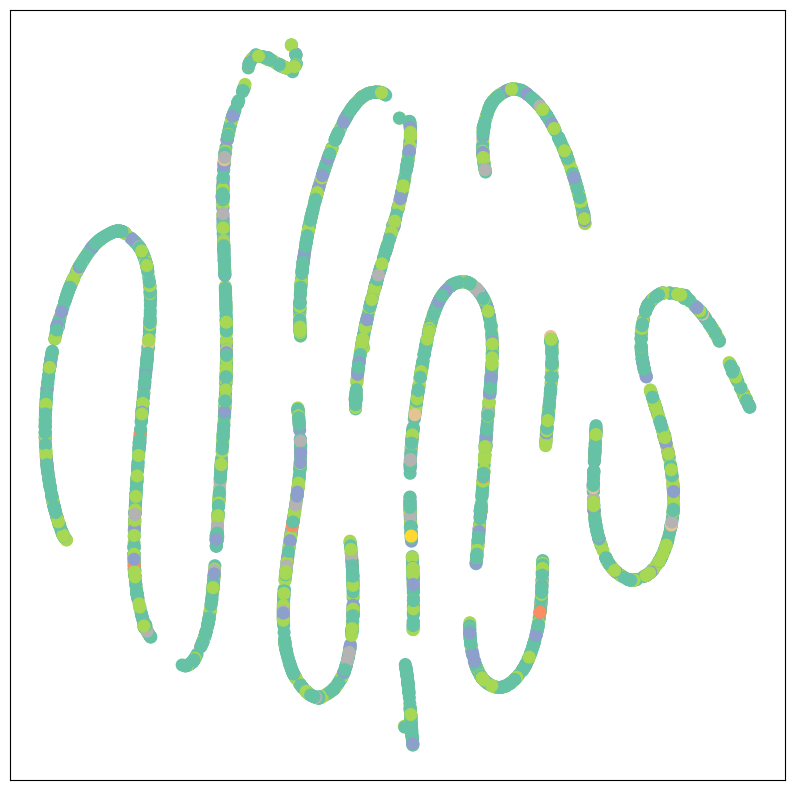

In [83]:
model = GCN(hidden_channels=16)
model.eval()

out = model(graph.x, graph.edge_index)
visualize(out, color=graph.y)

We certainly can do better by training our model.
The training and testing procedure is once again the same, but this time we make use of the node features `x` **and** the graph connectivity `edge_index` as input to our GCN model.

In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = GCN(hidden_channels=16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(graph.x, graph.edge_index)  # Perform a single forward pass.
      loss = criterion(out[graph.train_mask], graph.y[graph.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

def test():
      model.eval()
      out = model(graph.x, graph.edge_index)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[graph.test_mask] == graph.y[graph.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(graph.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc


for epoch in range(1, 1001):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

<IPython.core.display.Javascript object>

Epoch: 001, Loss: 1.7565
Epoch: 002, Loss: 1.7460
Epoch: 003, Loss: 1.7357
Epoch: 004, Loss: 1.7257
Epoch: 005, Loss: 1.7159
Epoch: 006, Loss: 1.7064
Epoch: 007, Loss: 1.6971
Epoch: 008, Loss: 1.6881
Epoch: 009, Loss: 1.6793
Epoch: 010, Loss: 1.6697
Epoch: 011, Loss: 1.6597
Epoch: 012, Loss: 1.6494
Epoch: 013, Loss: 1.6390
Epoch: 014, Loss: 1.6287
Epoch: 015, Loss: 1.6183
Epoch: 016, Loss: 1.6081
Epoch: 017, Loss: 1.5981
Epoch: 018, Loss: 1.5882
Epoch: 019, Loss: 1.5785
Epoch: 020, Loss: 1.5690
Epoch: 021, Loss: 1.5598
Epoch: 022, Loss: 1.5507
Epoch: 023, Loss: 1.5419
Epoch: 024, Loss: 1.5333
Epoch: 025, Loss: 1.5250
Epoch: 026, Loss: 1.5169
Epoch: 027, Loss: 1.5091
Epoch: 028, Loss: 1.5016
Epoch: 029, Loss: 1.4942
Epoch: 030, Loss: 1.4871
Epoch: 031, Loss: 1.4797
Epoch: 032, Loss: 1.4728
Epoch: 033, Loss: 1.4660
Epoch: 034, Loss: 1.4595
Epoch: 035, Loss: 1.4531
Epoch: 036, Loss: 1.4469
Epoch: 037, Loss: 1.4409
Epoch: 038, Loss: 1.4352
Epoch: 039, Loss: 1.4296
Epoch: 040, Loss: 1.4242


In [104]:
out = model(graph.x, graph.edge_index)


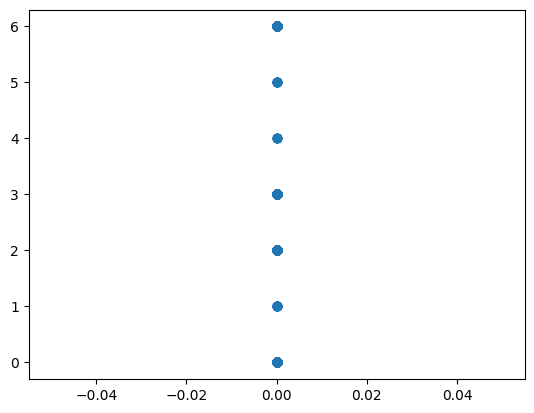

In [115]:
plt.scatter(out.argmax(dim=1), graph.y)

In [109]:
graph.y

tensor([6, 0, 3,  ..., 0, 0, 0])

After training the model, we can check its test accuracy:

In [103]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.5708


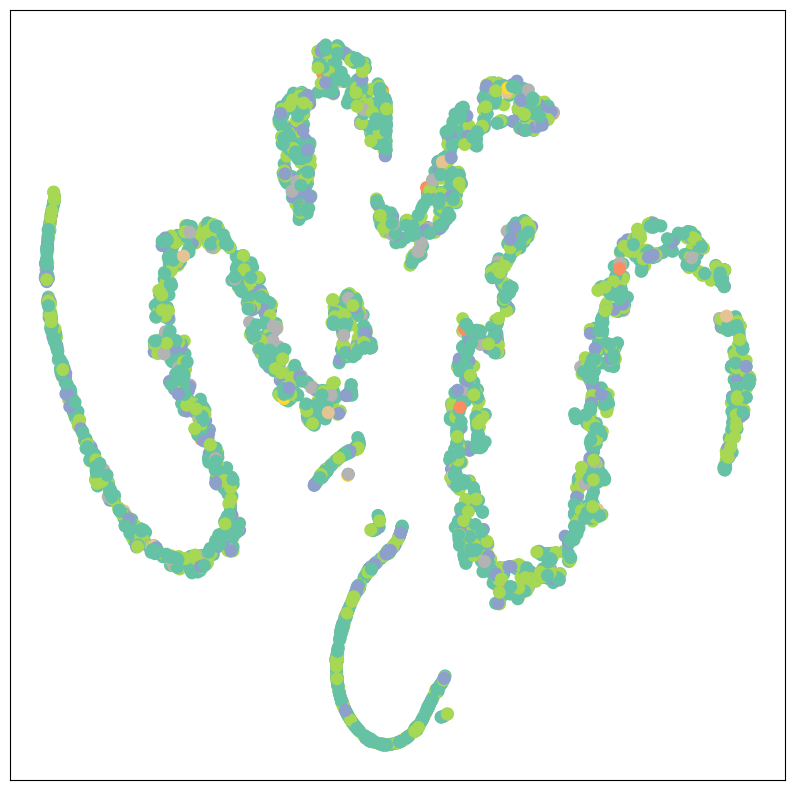

In [84]:
model.eval()

out = model(graph.x, graph.edge_index)
visualize(out, color=graph.y)

In [85]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GATConv

# Assuming num_features and num_classes are defined globally
# e.g., num_features = dataset.num_features, num_classes = dataset.num_classes

class GAT(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GATConv(num_features, hidden_channels, heads=8, dropout=0.6)
        # Output dim of conv1 is hidden_channels * heads, so we set in_channels accordingly
        self.conv2 = GATConv(hidden_channels * 8, num_classes, heads=1, concat=False, dropout=0.6)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        return x

model = GAT(hidden_channels=32)
print(model)

GAT(
  (conv1): GATConv(4, 32, heads=8)
  (conv2): GATConv(256, 7, heads=1)
)


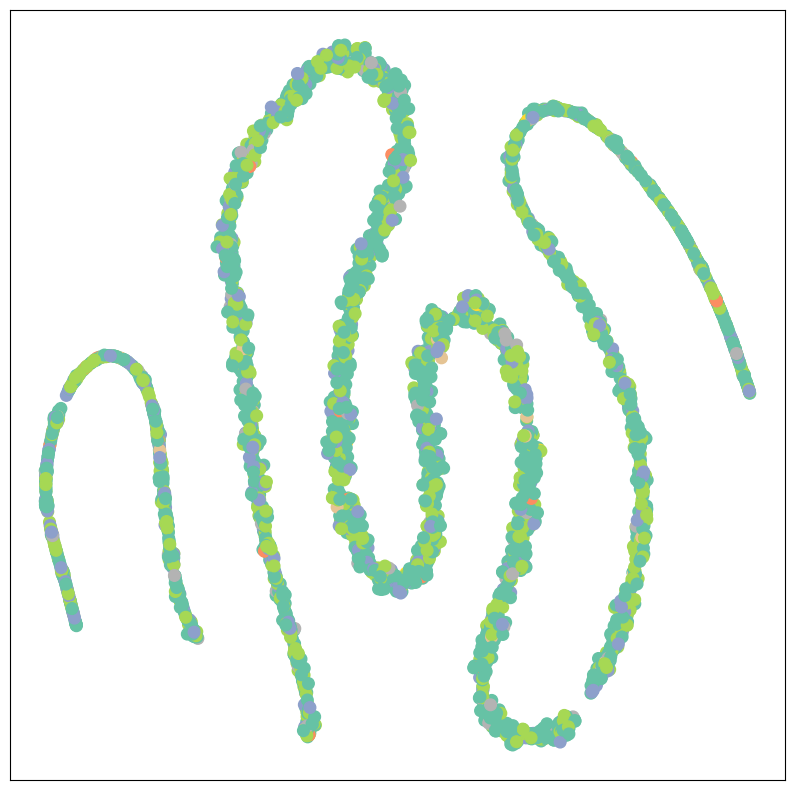

In [86]:
model = GAT(hidden_channels=32)
model.eval()

out = model(graph.x, graph.edge_index)
visualize(out, color=graph.y)

In [87]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = GAT(hidden_channels=32)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(graph.x, graph.edge_index)  # Perform a single forward pass.
      loss = criterion(out[graph.train_mask], graph.y[graph.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

def test():
      model.eval()
      out = model(graph.x, graph.edge_index)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[graph.test_mask] == graph.y[graph.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(graph.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc


for epoch in range(1, 1001):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

<IPython.core.display.Javascript object>

Epoch: 001, Loss: 1.8392
Epoch: 002, Loss: 1.5522
Epoch: 003, Loss: 1.4208
Epoch: 004, Loss: 1.3929
Epoch: 005, Loss: 1.4079
Epoch: 006, Loss: 1.3679
Epoch: 007, Loss: 1.3513
Epoch: 008, Loss: 1.3573
Epoch: 009, Loss: 1.3273
Epoch: 010, Loss: 1.3117
Epoch: 011, Loss: 1.3279
Epoch: 012, Loss: 1.3171
Epoch: 013, Loss: 1.2774
Epoch: 014, Loss: 1.3123
Epoch: 015, Loss: 1.3002
Epoch: 016, Loss: 1.2860
Epoch: 017, Loss: 1.2798
Epoch: 018, Loss: 1.2925
Epoch: 019, Loss: 1.2801
Epoch: 020, Loss: 1.2726
Epoch: 021, Loss: 1.2763
Epoch: 022, Loss: 1.2717
Epoch: 023, Loss: 1.2775
Epoch: 024, Loss: 1.2580
Epoch: 025, Loss: 1.2729
Epoch: 026, Loss: 1.2682
Epoch: 027, Loss: 1.2444
Epoch: 028, Loss: 1.2613
Epoch: 029, Loss: 1.2538
Epoch: 030, Loss: 1.2583
Epoch: 031, Loss: 1.2610
Epoch: 032, Loss: 1.2452
Epoch: 033, Loss: 1.2592
Epoch: 034, Loss: 1.2377
Epoch: 035, Loss: 1.2324
Epoch: 036, Loss: 1.2504
Epoch: 037, Loss: 1.2468
Epoch: 038, Loss: 1.2500
Epoch: 039, Loss: 1.2395
Epoch: 040, Loss: 1.2384


In [88]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.5708


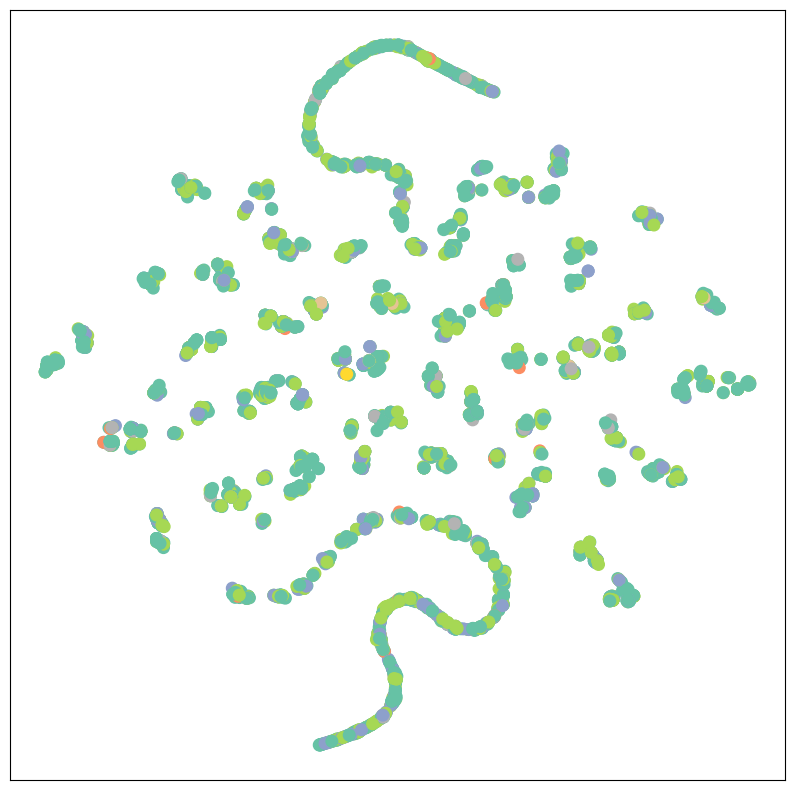

In [89]:
model.eval()

out = model(graph.x, graph.edge_index)
visualize(out, color=graph.y)